In [1]:
import timeit
from keras.models import Model,Sequential
from keras.layers import Input, Embedding, LSTM, Dense,concatenate,  Dropout, Flatten, Conv2D, MaxPool2D, Activation,MaxPooling2D
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.optimizers import Nadam,Adamax,Adadelta,Adagrad,RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.optimizers import SGD
from keras.datasets import mnist
from keras.utils import plot_model
from keras import initializers
from keras.initializers import RandomNormal,glorot_normal
from keras.models import model_from_json
from sklearn.model_selection import StratifiedKFold


import tensorflow as tf
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
import timeit
import pandas as pd


from IPython.display import Image

############################################################################
from numpy.random import seed
seed(1)
from tensorflow import set_random_seed
set_random_seed(2)

##############################################################
# We use this data set # https://www.kaggle.com/saranchandar/standard-classification-with-banana-dataset


C:\Users\BRG_user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Defining New Activation functions
############################################################################
def X_1(x):
    return (K.pow(x,1))
get_custom_objects().update({'X_1': Activation(X_1)})
############################################################################
def X_2(x):
    return (K.pow(x,2))/2
get_custom_objects().update({'X_2': Activation(X_2)})
############################################################################
def X_3(x):
    return (K.pow(x,3))/6
get_custom_objects().update({'X_3': Activation(X_3)})
############################################################################
def X_4(x):
    return (K.pow(x,4))/24
get_custom_objects().update({'X_4': Activation(X_4)})
############################################################################
def X_5(x):
    return (K.pow(x,5))/120
get_custom_objects().update({'X_5': Activation(X_5)})
###############################################################################
def X_6(x):
    return (K.pow(x,6))/720
get_custom_objects().update({'X_6': Activation(X_6)})
############################################################################
def X_7(x):
    return (K.pow(x,7))/5040
get_custom_objects().update({'X_7': Activation(X_7)})
############################################################################
def X_8(x):
    return (K.pow(x,8))/40320
get_custom_objects().update({'X_8': Activation(X_8)})
###############################################################################
def X_9(x):
    return (K.pow(x,8))/362880
get_custom_objects().update({'X_9': Activation(X_9)})
###############################################################################

In [3]:
#Define normalize Functions

def normalize(d):
    # d is a (n x dimension) np array
    d -= np.min(d, axis=0)
    d /= np.ptp(d, axis=0)
    return d



In [4]:
# fix random seed for reproducibility
# number of neurons in hidden layer SWAG
hidden_dimention=10
# input shape of  SWAG
in_ = Input(shape=(2,))
epochs=10
seed = 7
# https://www.kaggle.com/saranchandar/standard-classification-with-banana-dataset
dataset = np.loadtxt('banana.csv', delimiter=',', skiprows=1)
dataset=normalize(dataset)
X = dataset[:,0:2]
Y = dataset[:,2]


In [5]:

#  model one with 5 Layers
model1 = Sequential()
model1.add(Dense(12, input_dim=2, activation='relu'))
model1.add(Dense(10, activation='relu'))
model1.add(Dense(8, activation='relu'))
model1.add(Dense(5, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))




In [6]:
#  model two with 3 Layers.  2 Layers are Coming Frome SWAG and the Last one is Sigmoid


intial=glorot_normal(seed=None)

model2 = Sequential()

Layer_1_Act_X_1=Dense(hidden_dimention,kernel_initializer=intial, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_8')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention,kernel_initializer=intial, activation='linear')(Concatenate_First_Layer)

Out_put=Dense(10, activation='linear')(Out_put_first_layer)
sig=Dense(1, activation='sigmoid')(Out_put)


model2 = Model(in_ , sig)

In [7]:
#  model three  with 4 Layers.  all Layers are coming from SWAG

intial=glorot_normal(seed=None)

model3 = Sequential()

Layer_1_Act_X_1=Dense(hidden_dimention,kernel_initializer=intial, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_3')(in_)
###############################################################
Layer_1_Act_X_4=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_4')(in_)
###############################################################
Layer_1_Act_X_5=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_5')(in_)
###############################################################
Layer_1_Act_X_6=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_6')(in_)
###############################################################
Layer_1_Act_X_7=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_7')(in_)
###############################################################
Layer_1_Act_X_8=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_8')(in_)

Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_1_Act_X_4,Layer_1_Act_X_5,Layer_1_Act_X_6,Layer_1_Act_X_7,Layer_1_Act_X_8])

Out_put_first_layer=Dense(hidden_dimention,kernel_initializer=intial, activation='linear')(Concatenate_First_Layer)

###############################################################
Layer_2_Act_X_1=Dense(hidden_dimention,kernel_initializer=intial, activation='X_1')(Out_put_first_layer)
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention,kernel_initializer=intial, activation='X_2')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_3=Dense(hidden_dimention,kernel_initializer=intial, activation='X_3')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_4=Dense(hidden_dimention,kernel_initializer=intial, activation='X_4')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_5=Dense(hidden_dimention,kernel_initializer=intial, activation='X_5')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_6=Dense(hidden_dimention,kernel_initializer=intial, activation='X_6')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_7=Dense(hidden_dimention,kernel_initializer=intial, activation='X_7')(Out_put_first_layer)
###############################################################
Layer_2_Act_X_8=Dense(hidden_dimention,kernel_initializer=intial, activation='X_8')(Out_put_first_layer)
###############################################################
Concatenate_second_Layer = concatenate([Layer_2_Act_X_1,Layer_2_Act_X_2,Layer_2_Act_X_3,Layer_2_Act_X_4,Layer_2_Act_X_5,Layer_2_Act_X_6,Layer_2_Act_X_7,Layer_2_Act_X_8])
Out_put=Dense(1, activation='linear')(Concatenate_second_Layer)
#sig=Dense(1, activation='sigmoid')(Out_put)


model3 = Model(in_ , Out_put)
#model.summary()


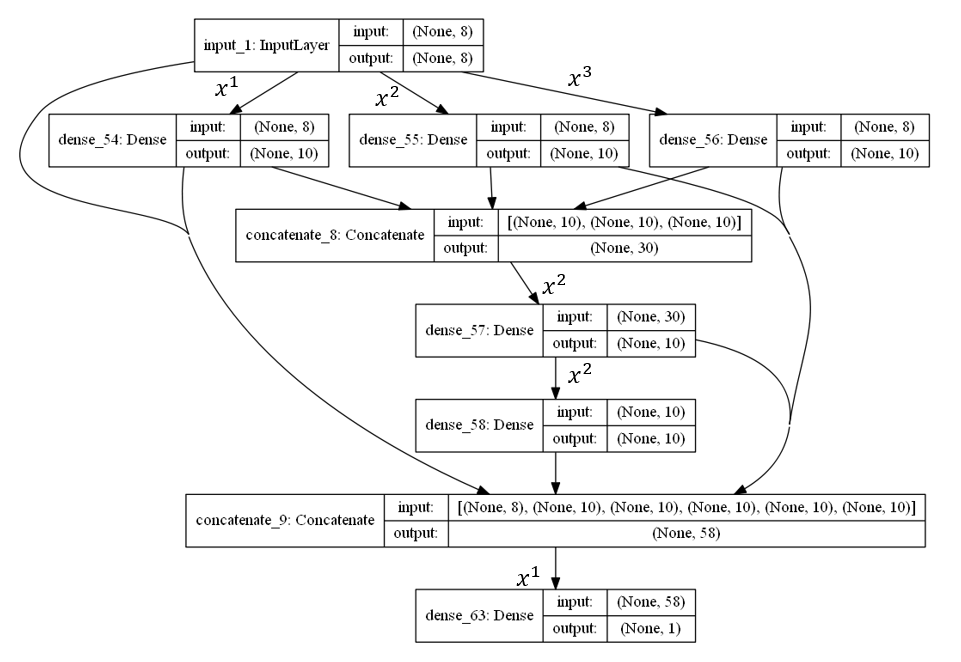

In [8]:
intial=glorot_normal(seed=None)

model4 = Sequential()

Layer_1_Act_X_1=Dense(hidden_dimention,kernel_initializer=intial, activation='X_1')(in_)
################################################################
Layer_1_Act_X_2=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_2')(in_)
###############################################################
Layer_1_Act_X_3=Dense(hidden_dimention,kernel_initializer=intial,  activation='X_3')(in_)
###############################################################
Concatenate_First_Layer = concatenate([Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3])
################################################################
Layer_2_Act_X_2=Dense(hidden_dimention, activation='X_2')(Concatenate_First_Layer)
Layer_3_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_2_Act_X_2)
Layer_4_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_3_Act_X_2)
Layer_5_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_4_Act_X_2)
Layer_6_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_5_Act_X_2)
Layer_8_Act_X_2=Dense(hidden_dimention, activation='X_2')(Layer_6_Act_X_2)

Concatenate_All_Layer = concatenate([in_,Layer_1_Act_X_1,Layer_1_Act_X_2,Layer_1_Act_X_3,Layer_2_Act_X_2,Layer_3_Act_X_2])


Out_put=Dense(1, activation='linear')(Concatenate_All_Layer)

model4 = Model(in_ , Out_put)


Image(filename='model4_plot.png')

In [9]:
# Complie All three models
Nadam1=Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)

model1.compile(loss='mean_squared_error', optimizer=Nadam1, metrics=['accuracy'])

model2.compile(loss='mean_squared_error', optimizer=Nadam1, metrics=['accuracy'])

model3.compile(loss='mean_squared_error', optimizer=Nadam1, metrics=['accuracy'])

model4.compile(loss='mean_squared_error', optimizer=Nadam1, metrics=['accuracy'])

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy

# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)
cvscores = []

total_time=0
for train, test in kfold.split(X, Y):
  # create model
	# Fit the model
	model=model1
	start = timeit.default_timer()
	model.fit(X[train], Y[train], epochs=epochs, batch_size=10, verbose=0)
	end = timeit.default_timer()
	total_time=total_time+(end-start)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("Total time = %.2f " % (total_time))

acc: 88.14%
acc: 90.21%
acc: 88.70%
acc: 90.02%
acc: 87.74%
acc: 90.57%
acc: 86.96%
acc: 89.98%
acc: 89.60%
acc: 88.85%
89.08% (+/- 1.13%)
Total time = 30.15 


In [11]:
total_time=0
for train, test in kfold.split(X, Y):
  # create model
	# Fit the model
	model=model2
	start = timeit.default_timer()
	model.fit(X[train], Y[train], epochs=epochs, batch_size=10, verbose=0)
	end = timeit.default_timer()
	total_time=total_time+(end-start)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("Total time = %.2f " % (total_time))

acc: 74.39%
acc: 80.60%
acc: 87.38%
acc: 89.83%
acc: 86.23%
acc: 90.00%
acc: 86.77%
acc: 90.93%
acc: 89.22%
acc: 86.01%
87.61% (+/- 3.79%)
Total time = 41.72 


In [12]:
total_time=0
for train, test in kfold.split(X, Y):
  # create model
	# Fit the model
	model=model3
	start = timeit.default_timer()
	model.fit(X[train], Y[train], epochs=epochs, batch_size=10, verbose=0)
	end = timeit.default_timer()
	total_time=total_time+(end-start)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("Total time = %.2f " % (total_time))

acc: 86.06%
acc: 88.32%
acc: 84.56%
acc: 87.38%
acc: 86.79%
acc: 90.00%
acc: 88.66%
acc: 85.26%
acc: 89.60%
acc: 89.04%
87.59% (+/- 3.26%)
Total time = 58.33 


In [13]:
total_time=0
for train, test in kfold.split(X, Y):
  # create model
	# Fit the model
	model=model4
	start = timeit.default_timer()
	model.fit(X[train], Y[train], epochs=epochs, batch_size=10, verbose=0)
	end = timeit.default_timer()
	total_time=total_time+(end-start)
	# evaluate the model
	scores = model.evaluate(X[test], Y[test], verbose=0)
	print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
	cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))
print("Total time = %.2f " % (total_time))

acc: 90.02%
acc: 88.14%
acc: 89.27%
acc: 88.89%
acc: 86.23%
acc: 89.25%
acc: 86.77%
acc: 88.09%
acc: 88.28%
acc: 89.22%
87.80% (+/- 2.90%)
Total time = 35.97 
